In [1]:
from pathlib import Path

# Automatically get the base path of your project
base_path = Path.cwd().parents[0]  # adjust .parents[0] if needed
print("Base path of the project:", base_path)

Base path of the project: c:\Users\Yusuf\OneDrive\LST\Derde_jaar\Y3Q4\Metaproteomics_with_db


In [2]:
# This code is more robust and will work regardless of the current working directory.
# Make sure that base_path is defined correctly.
# Install the requirements from the requirements.txt file
#!pip3 install -r "{base_path}/requirements.txt"

## Load Input Data for Community Composition Analysis

This section loads all relevant input files needed to compare microbial community compositions derived from multiple taxonomic pipelines.

We consider the following sources:
- **Pept2LCA-based composition**: taxonomic assignment based on least common ancestor from de novo peptides.
- **DIAMOND-based alignment results**: peptides matched to proteins using a custom reference database.
- **Metagenomics-derived taxa**: taxonomic annotations based on matching raw or predicted proteins against metagenomic data.

Each dataset is loaded into a separate pandas `DataFrame`. These data structures will be used in downstream visualizations of:
- Genus-level composition (e.g., for overview trends)
- Species-level composition (for finer resolution)
- Absolute vs. relative counts
This step ensures we have access to all necessary input tables before aggregation and plotting.


In [2]:
import pandas as pd
from pathlib import Path

# === Step 1: Define the community comparison folder path ===
# base_path should already be defined earlier in the notebook
community_dir = base_path / "Community_comparisons"

# === Step 2: Set paths to all relevant input CSV files ===
# These files contain microbial composition data derived from different tools/pipelines
file_pept2lca_genusdb = community_dir / "genus_composition_psm.csv"           # Pept2LCA matches at genus level (per PSM)
file_pept2lca_genus = community_dir / "genus_composition_pept2lca.csv"         # Pre-aggregated genus-level from Pept2LCA
file_pept2lca_species = community_dir / "species_composition_pept2lca.csv"       # Pre-aggregated species-level from Pept2LCA
file_diamond_proteome_lcas = community_dir / "diamond_from_proteomes_clust95_psm.csv"      # DIAMOND psm results with annotated taxonomy ranks
file_meta_garmerwolde_psm = community_dir / "metagenomics_psm_taxa_annotated.csv"     # Garmerwolde (aerobic granular sludge) metagenomics-derived matches from PSMs
file_meta_SP_MG_psm = community_dir / "SP_MG_metagenpsm_withlcas.csv"   # Simpelveld (aerobic granular sludge) metagenomics-derived matches from PSMs
file_meta_AS_MAGs_psm = community_dir / "AS_MAGs_taxa_ranks.csv" # Activated sludge metagenomics-derived matches from PSMs

# === Step 3: Load all files into pandas DataFrames ===
df_pept2lca_genusdb = pd.read_csv(file_pept2lca_genusdb)
df_pept2lca_genus = pd.read_csv(file_pept2lca_genus)
df_pept2lca_species = pd.read_csv(file_pept2lca_species)
df_diamond_proteome_lcas = pd.read_csv(file_diamond_proteome_lcas)
df_meta_garmerwolde_psm = pd.read_csv(file_meta_garmerwolde_psm)
df_meta_SP_MG_psm = pd.read_csv(file_meta_SP_MG_psm)
df_meta_AS_MAGs_psm = pd.read_csv(file_meta_AS_MAGs_psm)

# === Step 4: Preview loaded data for quality check ===
# This helps ensure all files were loaded correctly and contain expected structure
print("Pept2LCA Composition:")
display(df_pept2lca_genusdb.head())

print("Pept2LCA Genus Analysis:")
display(df_pept2lca_genus.head())

print("Pept2LCA Species Analysis:")
display(df_pept2lca_species.head())

print("Diamond Rank Annotated:")
display(df_diamond_proteome_lcas.head())

print("Garmerwolde metagenomics PSM Annotated:")
display(df_meta_garmerwolde_psm.head())

print("Simpelveld metagenomics PSM Annotated:")
display(df_meta_SP_MG_psm.head())

print("Activated sludge metagenomics Raw DB Annotated:")
display(df_meta_AS_MAGs_psm.head())

Pept2LCA Composition:


,Peptide,Accession,Taxon names,Taxon IDs,lca,lca rank
0,LGEHNIDVLEGNEQFINAAK,NaN,NaN,NaN,NaN,NaN
1,LGEHNIDVLEGNEQFINAAK,NaN,NaN,NaN,NaN,NaN
2,LGEHNIDVLEGNEQFINAAK,NaN,NaN,NaN,NaN,NaN
3,KVQAAQYVASHPGEVC(+57.02)PAK,A0A011PKS5|A0A011PKS5_9PROT:A0A935PZZ1|A0A935P...,"Candidatus Accumulibacter appositus, Candidatu...","1454003, 2954385, 327160, 2954383",Candidatus Accumulibacter,genus
4,KVQAAQYVASHPGEVC(+57.02)PAK,A0A011PKS5|A0A011PKS5_9PROT:A0A935PZZ1|A0A935P...,"Candidatus Accumulibacter appositus, Candidatu...","1454003, 2954385, 327160, 2954383",Candidatus Accumulibacter,genus


Pept2LCA Genus Analysis:


,Genus,Count,Relative Abundance (%)
0,Unclassified,707,70.278330
1,Candidatus Accumulibacter,153,15.208748
2,Nitrospira,46,4.572565
3,Candidatus Competibacter,35,3.479125
4,Nitrosomonas,31,3.081511


Pept2LCA Species Analysis:


,Species,Count,Relative Abundance (%)
0,Unclassified,851,84.592445
1,Candidatus Accumulibacter phosphatis,53,5.268390
2,Candidatus Competibacter denitrificans,35,3.479125
3,Nitrospira defluvii,26,2.584493
4,Nitrosomonas oligotropha,18,1.789264


Diamond Rank Annotated:


,Peptide,Accession,Taxon names,Taxon IDs,lca,lca rank
0,LGEHNIDVLEGNEQFINAAK,NaN,NaN,NaN,NaN,NaN
1,LGEHNIDVLEGNEQFINAAK,NaN,NaN,NaN,NaN,NaN
2,LGEHNIDVLEGNEQFINAAK,NaN,NaN,NaN,NaN,NaN
3,KVSYVLPAGSYAVGAGVYDDTPVATLESK,A0A936H9G0,Candidatus Competibacteraceae bacterium,2053538,Candidatus Competibacteraceae bacterium,species
4,KVSYVLPAGSYAVGAGVYDDTPVATLESK,A0A936H9G0,Candidatus Competibacteraceae bacterium,2053538,Candidatus Competibacteraceae bacterium,species


Garmerwolde metagenomics PSM Annotated:


,Peptide,-10lgP,Mass,Length,ppm,m/z,Z,RT,Area,Fraction,...,Scan,from Chimera,Source File,Accession,PTM,AScore,Found By,lca_taxid,taxon_name,taxon_rank
0,TPTTDGTQNDSAYDFSAAVHSAR,148.86,2411.0625,23,-1.2,804.6938,3,99.95,110500000.0,1,...,32903,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NODE_514_length_56624_cov_10.429334_2,NaN,NaN,PEAKS DB,1898103,Rhodocyclaceae bacterium,species
1,TPTTDGTQNDSAYDFSAAVHSAR,141.51,2411.0625,23,-1.2,804.6938,3,99.95,110500000.0,1,...,33198,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NODE_514_length_56624_cov_10.429334_2,NaN,NaN,PEAKS DB,1898103,Rhodocyclaceae bacterium,species
2,TPTTDGTQNDSAYDFSAAVHSAR,121.60,2411.0625,23,-1.2,804.6938,3,99.95,110500000.0,1,...,33478,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NODE_514_length_56624_cov_10.429334_2,NaN,NaN,PEAKS DB,1898103,Rhodocyclaceae bacterium,species
3,TPTTDGTQNDSAYDFSAAVHSAR,120.23,2411.0625,23,1.5,1206.5403,2,99.92,1075000.0,1,...,32757,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NODE_514_length_56624_cov_10.429334_2,NaN,NaN,PEAKS DB,1898103,Rhodocyclaceae bacterium,species
4,TPTTDGTQNDSAYDFSAAVHSAR,120.16,2411.0625,23,-0.1,804.6947,3,102.14,0.0,1,...,33762,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NODE_514_length_56624_cov_10.429334_2,NaN,NaN,PEAKS DB,1898103,Rhodocyclaceae bacterium,species


Simpelveld metagenomics PSM Annotated:


,Peptide,-10lgP,Mass,Length,ppm,m/z,Z,RT,Area,Fraction,...,Scan,from Chimera,Source File,Accession,PTM,AScore,Found By,Cleaned Sequence,lca name,lca rank
0,LGEHNIDVLEGNEQFINAAK,134.03,2210.0967,20,2.3,1106.0581,2,119.72,754000.0,1,...,41166,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NaN,NaN,NaN,PEAKS DB,IGEHNIDVIEGNEQFINAAK,Sus scrofa,species
1,LGEHNIDVLEGNEQFINAAK,92.19,2210.0967,20,0.1,737.7062,3,119.75,18576000.0,1,...,41372,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NaN,NaN,NaN,PEAKS DB,IGEHNIDVIEGNEQFINAAK,Sus scrofa,species
2,LGEHNIDVLEGNEQFINAAK,75.14,2210.0967,20,0.1,737.7062,3,119.75,18576000.0,1,...,41083,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NaN,NaN,NaN,PEAKS DB,IGEHNIDVIEGNEQFINAAK,Sus scrofa,species
3,KVSYVLPAGNYAVGAGVYDDTPVATLEAK,126.02,2967.5229,29,-0.2,990.1814,3,134.14,28251000.0,1,...,47415,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NODE_30_length_160789_cov_13.067801_10,NaN,NaN,PEAKS DB,KVSYVIPAGNYAVGAGVYDDTPVATIEAK,NaN,NaN
4,KVSYVLPAGNYAVGAGVYDDTPVATLEAK,101.90,2967.5229,29,-0.2,990.1814,3,134.14,28251000.0,1,...,47701,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NODE_30_length_160789_cov_13.067801_10,NaN,NaN,PEAKS DB,KVSYVIPAGNYAVGAGVYDDTPVATIEAK,NaN,NaN


Activated sludge metagenomics Raw DB Annotated:


,Peptide,-10lgP,Mass,Length,ppm,m/z,Z,RT,Area,Fraction,...,Scan,from Chimera,Source File,Accession,PTM,AScore,Found By,Taxon_names,Cleaned_Sequence,Taxon_rank
0,LGEHNIDVLEGNEQFINAAK,122.75,2210.0967,20,2.3,1106.0581,2,119.72,754000.0,1,...,41166,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NaN,NaN,NaN,PEAKS DB,Sus scrofa,IGEHNIDVIEGNEQFINAAK,species
1,LGEHNIDVLEGNEQFINAAK,84.45,2210.0967,20,0.1,737.7062,3,119.75,18576000.0,1,...,41372,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NaN,NaN,NaN,PEAKS DB,Sus scrofa,IGEHNIDVIEGNEQFINAAK,species
2,LGEHNIDVLEGNEQFINAAK,69.67,2210.0967,20,0.1,737.7062,3,119.75,18576000.0,1,...,41083,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,NaN,NaN,NaN,PEAKS DB,Sus scrofa,IGEHNIDVIEGNEQFINAAK,species
3,GAHGDLMDEAAALQNYTVESADNSDIVVGR,116.35,3117.4309,30,0.0,1040.1509,3,143.89,2724900.0,1,...,51408,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,hypothetical protein IPI17_15100 [Nitrosomona...,NaN,NaN,PEAKS DB,Nitrosomonas sp,GAHGDIMDEAAAIQNYTVESADNSDIVVGR,species
4,GAHGDLMDEAAALQNYTVESADNSDIVVGR,39.26,3117.4309,30,-5.4,1040.1453,3,140.06,0.0,1,...,49855,No,MP_RZ07032023_GW_flat_180min_DDA02.raw,hypothetical protein IPI17_15100 [Nitrosomona...,NaN,NaN,PEAKS DB,Nitrosomonas sp,GAHGDIMDEAAAIQNYTVESADNSDIVVGR,species


## Genus-Level Microbial Composition Plot (Relative Abundance)

This section generates a **stacked bar chart** showing the **relative abundance of microbial genera** across different datasets.

We compare the output from multiple pipelines:
- `Pept2LCA`: Pre-computed genus-level composition from de novo peptide LCA mapping.
- `Genus db (PSM)`: Taxonomic assignment using a genus-filtered custom database.
- `Metagenomics PSM`: Matches from a protein-spectrum match (PSM) search against metagenomic proteins.
- `Metagenomics RawDB`: Matches against raw metagenomic database entries.

To keep the plot interpretable:
- Only the top `N` most abundant genera are shown explicitly.
- Less abundant genera can be grouped into an `'Other'` category (if `collapse_other=True`).
- Relative abundances are calculated per dataset to normalize for differences in total peptide counts.

This visualization provides a quick comparison of taxonomic resolution and bias introduced by each method.


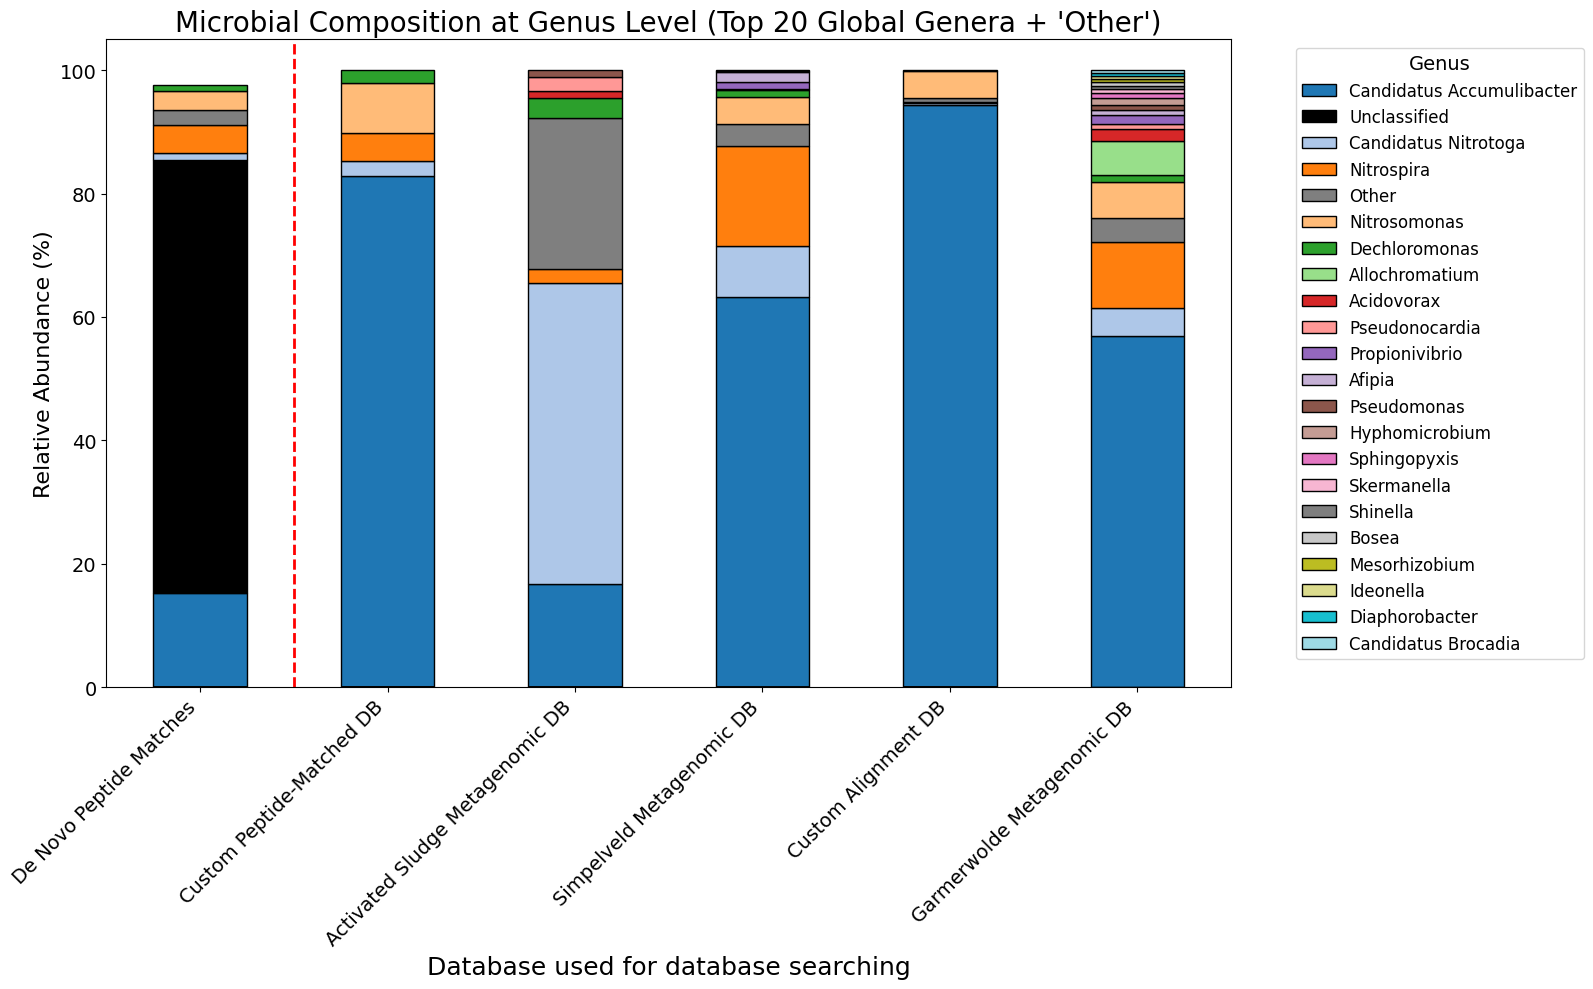

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from pathlib import Path
import seaborn as sns

# === Settings ===
TOP_N = 20
collapse_other = True

# === Input directory ===
community_dir = base_path / "Community_comparisons"

# === Load datasets ===
df_pept2lca = pd.read_csv(community_dir / "genus_composition_pept2lca.csv")
df_pept2lca_genusdb = pd.read_csv(community_dir / "genus_composition_psm.csv")
df_meta_garmerwolde = pd.read_csv(community_dir / "metagenomics_psm_taxa_annotated.csv")
df_meta_SP_MG = pd.read_csv(community_dir / "SP_MG_metagenpsm_withlcas.csv")
df_meta_AS_MAGs = pd.read_csv(community_dir / "AS_MAGs_taxa_ranks.csv")
df_diamond_proteomes = pd.read_csv(community_dir / "diamond_from_proteomes_clust95_psm.csv")

def compute_counts(df, name_col, label, rank_col=None):
    df = df.copy()
    if rank_col:
        df = df[df[rank_col].str.lower() == "genus"]
    df = df[[name_col]].dropna()
    df.columns = ["Genus"]
    df["Genus"] = df["Genus"].replace({"root": "Unclassified"})
    counts = df["Genus"].value_counts().reset_index()
    counts.columns = ["Genus", "Count"]
    counts["Dataset"] = label
    return counts

# === Compute counts ===
counts_pept2lca_genusdb = compute_counts(df_pept2lca_genusdb, "lca", "Pept2LCA DB (PSM)", rank_col="lca rank")
counts_meta_garmerwolde = compute_counts(df_meta_garmerwolde, "taxon_name", "Garmerwolde Meta (PSM)", rank_col="taxon_rank")
counts_meta_SP_MG = compute_counts(df_meta_SP_MG, "lca name", "Simpelveld Meta (PSM)", rank_col="lca rank")
counts_meta_AS_MAGs = compute_counts(df_meta_AS_MAGs, "Taxon_names", "Activated Sludge MAGs (PSM)", rank_col="Taxon_rank")
counts_diamond = compute_counts(df_diamond_proteomes, "lca", "DIAMOND Proteome DB", rank_col="lca rank")

all_counts = pd.concat([
    counts_pept2lca_genusdb,
    counts_meta_garmerwolde,
    counts_meta_SP_MG,
    counts_meta_AS_MAGs,
    counts_diamond
], ignore_index=True)

# === Top genera globally ===
top_genera = all_counts.groupby("Genus")["Count"].sum().nlargest(TOP_N).index.tolist()
if "Unclassified" not in top_genera:
    top_genera.append("Unclassified")

# === De Novo dataset ===
df_pept2lca_plot = df_pept2lca[["Genus", "Relative Abundance (%)"]].copy()
df_pept2lca_plot.columns = ["Genus", "Abundance"]
df_pept2lca_plot["Dataset"] = "De Novo Inference (UniPept Pept2LCA)"

df_pept2lca_plot["Genus"] = df_pept2lca_plot["Genus"].apply(
    lambda x: x if x in top_genera else ("Other" if collapse_other else None)
)
df_pept2lca_plot = df_pept2lca_plot[df_pept2lca_plot["Genus"].notna()]

def compute_relative(df_counts):
    df_counts = df_counts.copy()
    df_counts["Genus"] = df_counts["Genus"].apply(lambda x: x if x in top_genera else ("Other" if collapse_other else None))
    df_counts = df_counts[df_counts["Genus"].notna()]
    df_grouped = df_counts.groupby(["Dataset", "Genus"], as_index=False)["Count"].sum()
    df_grouped["Abundance"] = df_grouped.groupby("Dataset")["Count"].transform(lambda x: x / x.sum() * 100)
    return df_grouped[["Dataset", "Genus", "Abundance"]]

plot_data_other = compute_relative(all_counts)
plot_data_final = pd.concat([plot_data_other, df_pept2lca_plot[["Dataset", "Genus", "Abundance"]]])

# === More descriptive dataset names ===
dataset_renames = {
    "De Novo Inference (UniPept Pept2LCA)": "De Novo Peptide Matches",
    "Pept2LCA DB (PSM)": "Custom Peptide-Matched DB",
    "Activated Sludge MAGs (PSM)": "Activated Sludge Metagenomic DB",
    "Simpelveld Meta (PSM)": "Simpelveld Metagenomic DB",
    "DIAMOND Proteome DB": "Custom Alignment DB",
    "Garmerwolde Meta (PSM)": "Garmerwolde Metagenomic DB"
}
plot_data_final["Dataset"] = plot_data_final["Dataset"].replace(dataset_renames)

# === Reorder ===
desired_order = [
    "De Novo Peptide Matches",
    "Custom Peptide-Matched DB",
    "Activated Sludge Metagenomic DB",
    "Simpelveld Metagenomic DB",
    "Custom Alignment DB",
    "Garmerwolde Metagenomic DB"
]

pivot = plot_data_final.pivot_table(index="Dataset", columns="Genus", values="Abundance", fill_value=0)
pivot = pivot[pivot.sum(axis=0).sort_values(ascending=False).index]
pivot = pivot.reindex(desired_order)

# === Colors ===
fixed_colors = {"Unclassified": "#000000", "Other": "#7f7f7f"}
remaining_genera = [g for g in pivot.columns if g not in fixed_colors]
palette = sns.color_palette("tab20", len(remaining_genera))
color_map = {g: c for g, c in zip(remaining_genera, palette)}
color_map.update(fixed_colors)
ordered_colors = [color_map[g] for g in pivot.columns]

# === Plot ===
fig, ax = plt.subplots(figsize=(16, 10))

bars = pivot.plot(
    kind="bar",
    stacked=True,
    edgecolor="black",
    ax=ax,
    color=ordered_colors
)

# === Add vertical separator line after first bar ===
ax.axvline(x=0.5, color="red", linestyle="--", linewidth=2)

# === Format ===
ax.set_ylabel("Relative Abundance (%)", fontsize=16)
ax.set_xlabel("Database used for database searching", fontsize=18)
ax.set_title("Microbial Composition at Genus Level (Top 20 Global Genera + 'Other')", fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=14)
ax.tick_params(axis="y", labelsize=14)
ax.legend(title="Genus", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=12, title_fontsize=14)

plt.tight_layout()
plt.show()


### Results Interpretation and Discussion: Genus-Level Microbial Composition (Top 20 + Unclassified + Other)

The stacked bar plot shown above compares the relative microbial genus-level composition across six different protein databases, including both de novo and PSM-based identifications. The top 20 most abundant genera across all datasets were selected globally, with the addition of *"Unclassified"* and *"Other"* categories to capture unmatched or low-abundance taxa, respectively.

#### Key Observations:

- **De novo Pept2LCA (Direct)** stands out with a **very large fraction of unclassified peptides**, which is expected due to the absence of a comprehensive reference database during peptide identification. This highlights the exploratory power of de novo sequencing but also its reliance on accurate taxonomic tools (e.g., UniPept) for downstream assignment.
  
- In contrast, **Pept2LCA Proteomes DB (PSM)** shows **dominance of *Candidatus Accumulibacter*** with a high relative abundance (>80%), and a near-absence of unclassified sequences. This suggests that reference-based matching with a targeted protein DB enables deep but potentially narrow identification, biased toward well-represented organisms.

- **Activated Sludge Metagen (PSM)** reveals a much broader microbial diversity, with moderate contributions from *Candidatus Accumulibacter*, *Candidatus Nitrotoga*, *Nitrosospira*, and *Nitrosomonas*. Interestingly, the *Unclassified* fraction is relatively small here, implying that the metagenomic assembly used to generate this DB covers a large portion of the community.

- **Simpelveld Metagen (PSM)** similarly shows good coverage of common wastewater genera (*Nitrospira*, *Candidatus Accumulibacter*, etc.) but with less dominance from a single taxon. The lower *Unclassified* fraction compared to de novo further supports the utility of matched metagenome-guided databases.

- **DIAMOND Proteomes DB (PSM)** produces a relatively narrow spectrum, again with *Candidatus Accumulibacter* as the dominant genus, indicating potential bias toward abundant reference organisms in UniProt proteomes. The *Other* and *Unclassified* categories are minimal, consistent with strict DB matching.

- **Garmerwolde Metagen (PSM)** has the most taxonomic diversity among the PSM-based datasets, showing multiple genera (e.g., *Nitrosomonas*, *Dechloromonas*, *Pseudomonas*, *Candidatus Phosphoribacter*) with visible relative abundance. This suggests that metagenome-informed DBs built from complex communities (like Garmerwolde) allow broader taxonomic detection.

#### Interpretation:

This figure demonstrates how the **choice of database construction strategy** strongly shapes the observed taxonomic profile in metaproteomics. Specifically:
- **De novo-based strategies** provide a broad exploratory view but are limited by taxonomic annotation accuracy.
- **Custom protein DBs** (e.g., from metagenomes or curated proteomes) can significantly improve assignment depth, especially when representative organisms are included.
- However, they may **under-represent novel or low-abundance organisms**, leading to biases in community composition interpretation.

The consistent dominance of *Candidatus Accumulibacter* across multiple strategies underscores its central role in these sludge-based environments but also raises concerns about **over-representation** in reference sets.

#### Conclusion:

To balance **breadth** and **depth** in microbial identification, a hybrid strategy combining **de novo**, **metagenome-derived**, and **public reference DBs** may be most effective. This enables detection of known dominant taxa while preserving the capacity to explore rare or novel organisms. The figure provides visual evidence for why **no single database strategy is sufficient** on its own and highlights the importance of methodologically-aware interpretation of metaproteomic results.


## Genus-Level Microbial Composition Plot (Absolute PSM/Peptide Counts)

In this section, we visualize the **absolute number of matched PSMs or peptides** assigned to different microbial genera across multiple identification strategies:

- `Pept2LCA`: Genus assignments from de novo peptides using least common ancestor (LCA) via UniPept.
- `Genus db (PSM)`: Identifications using a genus-filtered custom protein database.
- `Metagenomics PSM`: Matches against metagenomic proteins (PSM-based annotation).
- `Metagenomics RawDB`: Matches against all proteins from a metagenomic raw reference.

**Purpose**:
- Unlike relative abundance plots, this view highlights the **absolute identification yield** from each method.
- Helps determine which pipelines return more identifications per taxonomic group.
- Useful for assessing sensitivity, database coverage, or bias introduced by filtering.

**Configurable options**:
- `TOP_N`: Limits the number of most abundant genera to visualize (rest grouped or discarded).
- `collapse_other`: If `True`, genera outside the top-N are grouped into `"Other"`.
- `included`: Select which datasets to include in the comparison.


C:\Temp\ipykernel_17200\510693203.py:66: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df_plot.pivot_table(index="Dataset", columns="Rank", values="Count", fill_value=0)


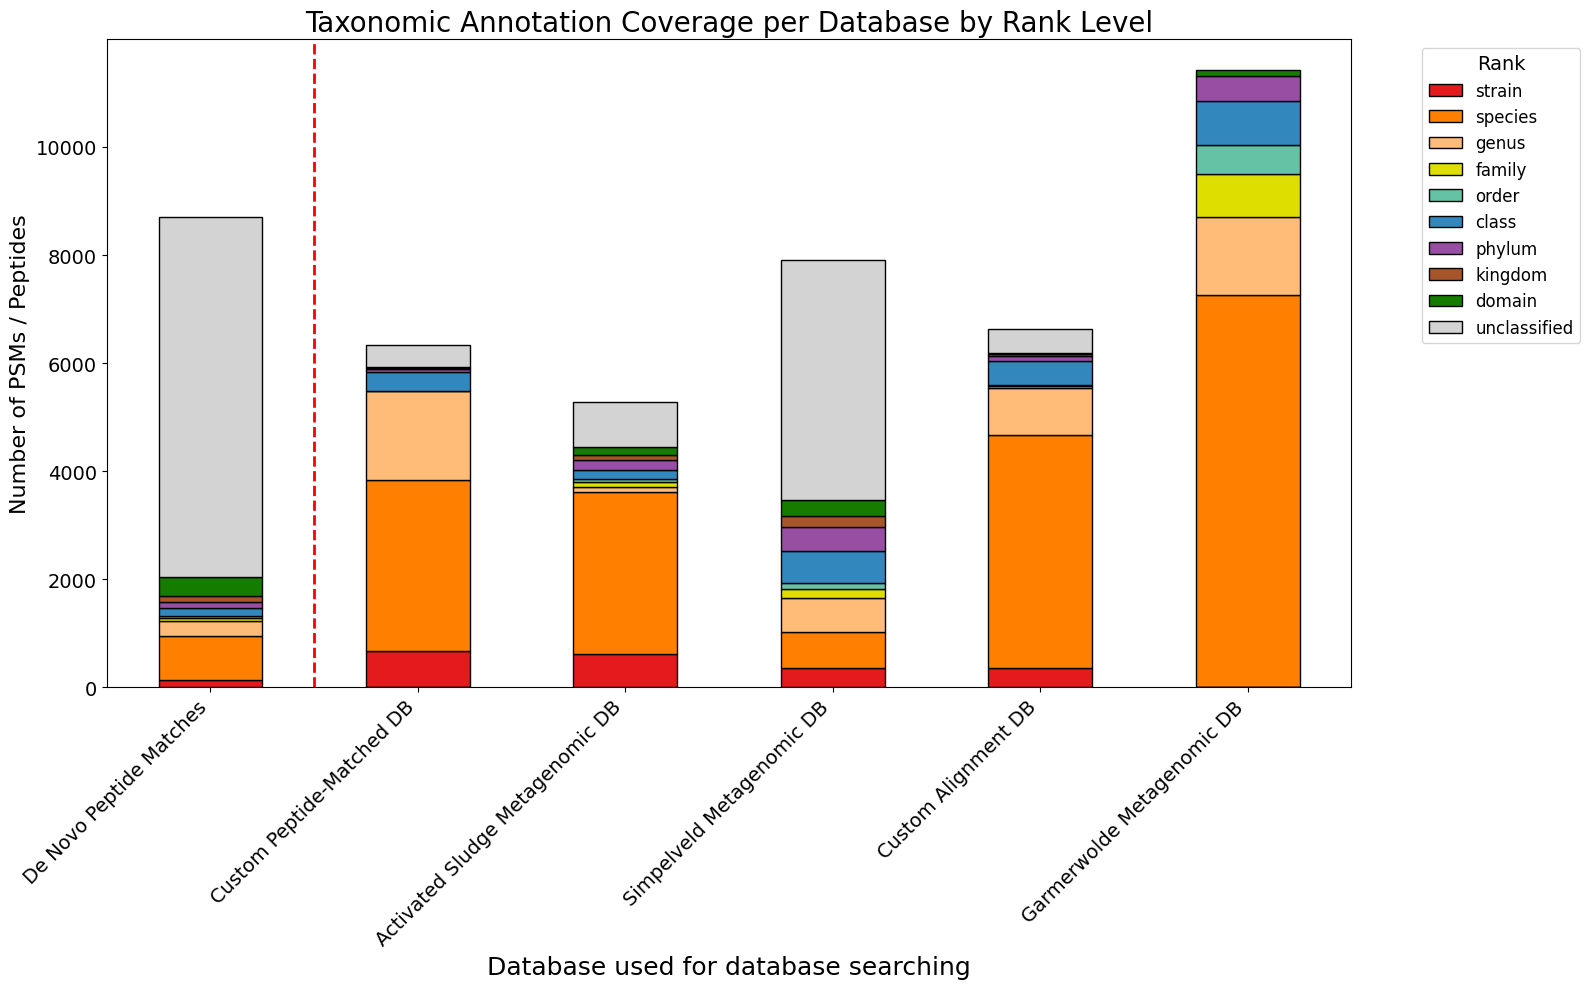

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# === Paths & Settings ===
base_path = Path.cwd().parents[0]  # Adjust if needed
community_dir = base_path / "Community_comparisons"

rank_order = ["strain", "species", "genus", "family", "order", "class", "phylum", "kingdom", "domain", "unclassified"]

dataset_order = [
    "De Novo Peptide Matches",
    "Custom Peptide-Matched DB",
    "Activated Sludge Metagenomic DB",
    "Simpelveld Metagenomic DB",
    "Custom Alignment DB",
    "Garmerwolde Metagenomic DB"
]

rank_colors = {
    "unclassified": "lightgray",
    "strain": "#e41a1c", "species": "#ff7f00", "genus": "#ffbb78",
    "family": "#dede00", "order": "#66c2a5", "class": "#3288bd",
    "phylum": "#984ea3", "kingdom": "#a65628", "domain": "#157c00"
}

# === Load and clean de novo Pep2LCA ===
df_de_novo = pd.read_csv(community_dir / "pept2lca_unipept_results.csv")
df_de_novo["Global LCA Rank"] = df_de_novo["Global LCA Rank"].fillna("unclassified").str.lower()
df_de_novo["Global LCA Rank"] = df_de_novo["Global LCA Rank"].apply(lambda r: r if r in rank_order else "unclassified")
counts_de_novo = df_de_novo["Global LCA Rank"].value_counts().reset_index()
counts_de_novo.columns = ["Rank", "Count"]
counts_de_novo["Dataset"] = "De Novo Peptide Matches"

# === Helper for other datasets ===
def extract_rank_counts(path, rank_columns, dataset_name):
    df = pd.read_csv(path)
    rank_col = next((col for col in rank_columns if col in df.columns), None)
    if not rank_col:
        raise ValueError(f"No valid rank column found in {path}")
    df[rank_col] = df[rank_col].str.lower().fillna("unclassified")
    df[rank_col] = df[rank_col].apply(lambda r: r if r in rank_order else "unclassified")
    counts = df[rank_col].value_counts().reset_index()
    counts.columns = ["Rank", "Count"]
    counts["Dataset"] = dataset_name
    return counts

# === Process other datasets with clearer names ===
datasets = [
    ("genus_composition_psm.csv", ["lca rank"], "Custom Peptide-Matched DB"),
    ("AS_MAGs_taxa_ranks.csv", ["Taxon_rank"], "Activated Sludge Metagenomic DB"),
    ("SP_MG_metagenpsm_withlcas.csv", ["lca rank"], "Simpelveld Metagenomic DB"),
    ("diamond_from_proteomes_clust95_psm.csv", ["lca rank"], "Custom Alignment DB"),
    ("metagenomics_psm_taxa_annotated.csv", ["taxon_rank"], "Garmerwolde Metagenomic DB")
]

all_counts = [counts_de_novo]
for file, columns, label in datasets:
    all_counts.append(extract_rank_counts(community_dir / file, columns, label))

# === Combine and prepare ===
df_plot = pd.concat(all_counts, ignore_index=True)
df_plot["Rank"] = pd.Categorical(df_plot["Rank"], categories=rank_order[::-1], ordered=True)
df_plot["Dataset"] = pd.Categorical(df_plot["Dataset"], categories=dataset_order, ordered=True)

pivot = df_plot.pivot_table(index="Dataset", columns="Rank", values="Count", fill_value=0)
pivot = pivot[rank_order]  # reorder columns

# === Plot ===
fig, ax = plt.subplots(figsize=(16, 10))

bars = pivot.plot(
    kind="bar",
    stacked=True,
    ax=ax,
    edgecolor="black",
    color=[rank_colors[r] for r in pivot.columns]
)

# Separator line after first bar
ax.axvline(x=0.5, color="red", linestyle="--", linewidth=2)

# Labels and title
ax.set_ylabel("Number of PSMs / Peptides", fontsize=16)
ax.set_xlabel("Database used for database searching", fontsize=18)
ax.set_title("Taxonomic Annotation Coverage per Database by Rank Level", fontsize=20)

# Tick label formatting
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right", fontsize=14)
ax.tick_params(axis='y', labelsize=14)

# Legend formatting
ax.legend(
    title="Rank",
    title_fontsize=14,
    fontsize=12,
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()


### Results and Discussion – Taxonomic Annotation Coverage per Dataset

This figure shows the absolute number of taxonomically annotated peptides/PSMs across six different datasets, stratified by taxonomic rank. These datasets span both reference-based (e.g., DIAMOND and Pep2LCA using proteome databases) and de novo (Pep2LCA direct) approaches. The y-axis indicates the number of matched peptide-spectrum matches (PSMs) or peptides, while the stacked bars reflect their assignment to taxonomic ranks from strain to domain, including the fraction that remains *unclassified*.

#### De novo Pep2LCA (Direct)
The de novo approach shows a notably high number of peptide identifications (~8700), but the majority (over 6600 peptides) remain unclassified. This is expected due to the limited ability of short de novo inferred peptides to achieve precise taxonomic matches in databases such as UniPept. Only a minor fraction could be assigned to established ranks, with species and genus-level assignments being particularly sparse. This highlights the challenge of confident taxonomic placement in alignment-free approaches, though the raw discovery potential remains high.

#### Garmerwolde Metagenomics DB (PSM)
This database, based on sample-specific metagenomic sequencing, yields the highest taxonomic annotation coverage. Nearly all peptides were classified, with the largest fraction reaching the species level and many extending to higher taxonomic ranks such as genus, family, and phylum. This supports the idea that sample-matched metagenomic databases provide the most comprehensive reference framework for taxonomic identification, minimizing false negatives and maximizing annotation depth.

#### DIAMOND and Pep2LCA Proteomes DB (PSM)
Both DIAMOND-based and Pep2LCA-based searches using clustered proteome databases result in intermediate coverage. While DIAMOND achieves a higher absolute number of annotations than Pep2LCA in this context, both methods show similar rank distributions with a clear peak at the species level and a gradual tapering across higher ranks. Notably, a non-trivial number of peptides remain unclassified, indicating that public reference proteomes may lack sufficient representation of all microbial diversity present in environmental samples.

#### Activated Sludge and Simpelveld Metagenomes (PSM)
These sample-specific metagenomes (from different wastewater treatment facilities) provide moderate annotation depth. Simpelveld notably exhibits a higher fraction of unclassified peptides (~4400), potentially due to limitations in the breadth or depth of the associated metagenome or differences in preprocessing and taxonomic resolution. Nevertheless, both datasets still recover a broad range of taxonomic ranks, underscoring the value of using localized databases even when not as complete as Garmerwolde's.

---

### Summary
Overall, **sample-matched metagenomic databases (e.g., Garmerwolde)** show the most complete taxonomic annotation, while **de novo approaches** provide high peptide recovery but suffer from low classification rates. **Generic proteome-based databases** offer a middle ground, but with room for improvement in capturing uncultured or underrepresented taxa. These results underline the importance of balancing **coverage, specificity, and computational feasibility** when designing metaproteomics pipelines.


## Species-Level Microbial Composition (Relative Abundance)

This section creates a **stacked bar plot** showing the **relative abundance (%)** of identified species across four different data sources:

- `DIAMOND`: Protein annotations from DIAMOND alignments with species-level taxonomic rank.
- `Pept2LCA`: Taxonomic assignments of de novo peptides using UniPept's LCA (species-level fallback).
- `Metagenomics PSM`: PSM-based species assignments matched to a metagenomic reference.
- `Metagenomics RawDB`: Matches against the raw metagenomic database, unfiltered.

### Why we do this:
This figure allows us to:
- Visualize **taxonomic composition at the species level**.
- Compare how different databases and pipelines affect biological interpretation.
- Evaluate whether certain pipelines lead to biased or incomplete species profiles.

### Configuration:
- `TOP_N`: Number of most abundant species shown explicitly.
- `collapse_other`: Toggle to include remaining species in an `"Other"` group.
- `include_unclassified`: If `True`, also include hits labeled `"Unclassified"` or `"root"`.


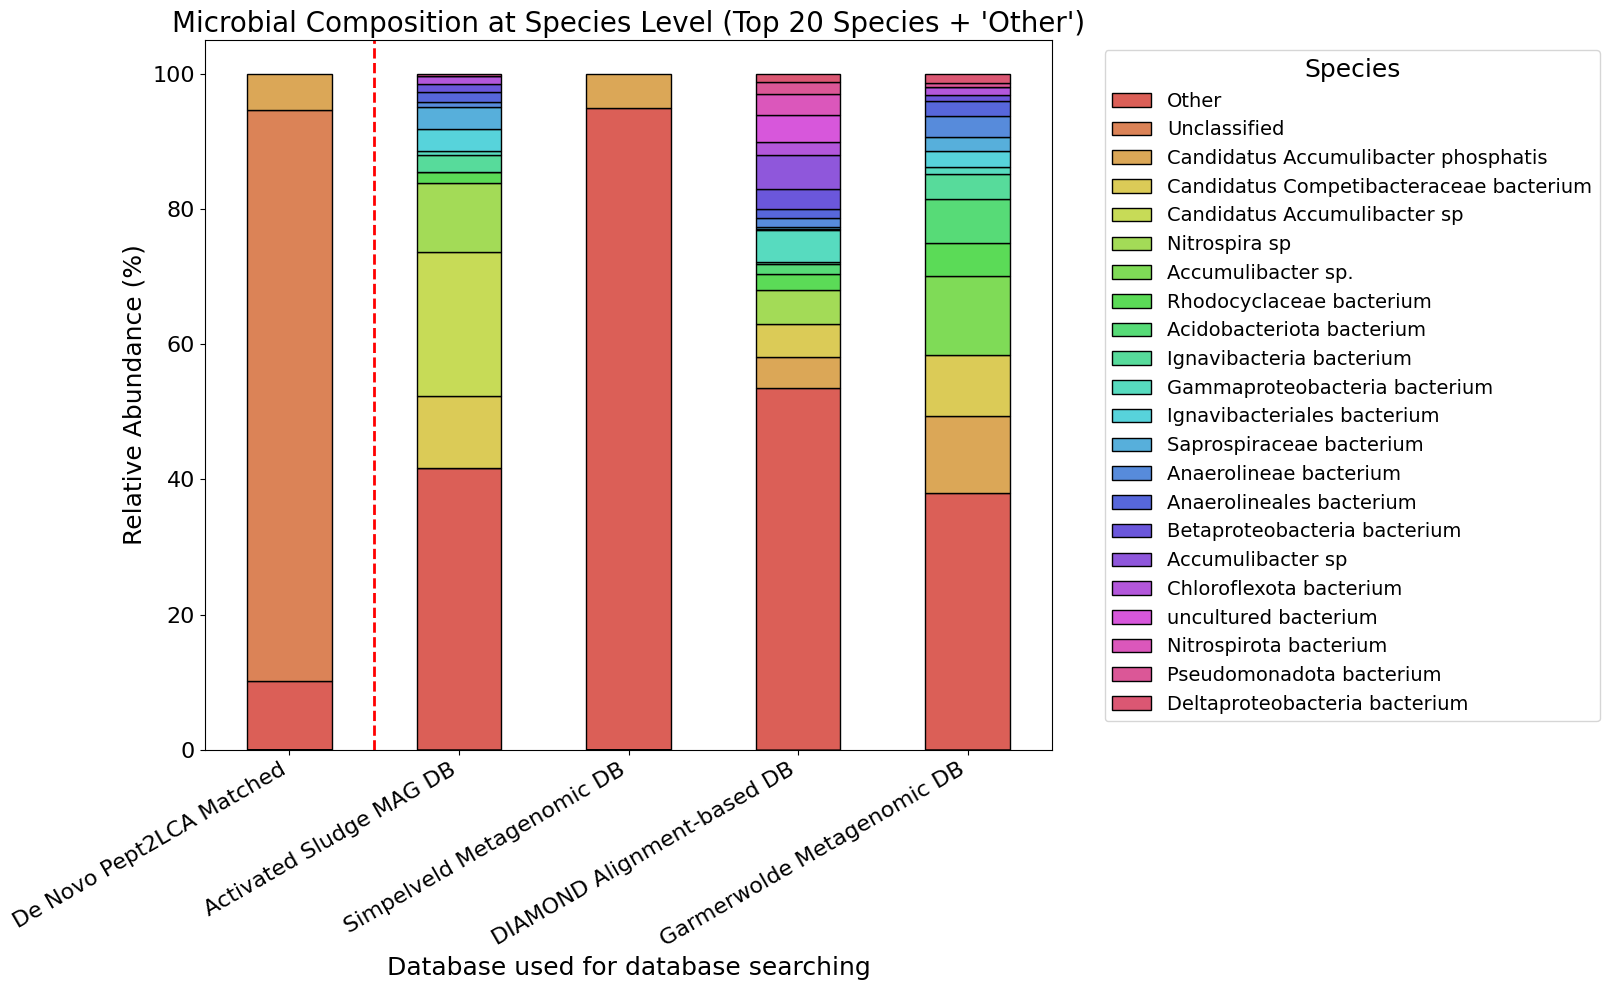

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

# === Settings ===
TOP_N = 20
collapse_other = True
include_unclassified = True

# === Define paths ===
community_dir = base_path / "Community_comparisons"
file_diamond = community_dir / "diamond_df_rank_annotated_fixed.csv"
file_pept2lca_species = community_dir / "species_composition_pept2lca.csv"
file_meta_garmerwolde = community_dir / "metagenomics_psm_taxa_annotated.csv"
file_meta_SP_MG = community_dir / "SP_MG_metagenpsm_withlcas.csv"
file_meta_AS_MAGs = community_dir / "AS_MAGs_taxa_ranks.csv"

# === Load data ===
df_diamond = pd.read_csv(file_diamond)
df_pept2lca = pd.read_csv(file_pept2lca_species)
df_meta_garmerwolde = pd.read_csv(file_meta_garmerwolde)
df_meta_SP_MG = pd.read_csv(file_meta_SP_MG)
df_meta_AS_MAGs = pd.read_csv(file_meta_AS_MAGs)

# === Helper function without Top N filtering ===
def compute_species_abundance(df, col, dataset_label, allow_unclassified=True):
    df = df[[col]].dropna().copy()
    df.columns = ["Species"]
    if not allow_unclassified:
        df = df[~df["Species"].isin(["Unclassified", "root", "unknown", "not_found"])]

    species_counts = df["Species"].value_counts().reset_index()
    species_counts.columns = ["Species", "Count"]
    species_counts["Abundance"] = species_counts["Count"] / species_counts["Count"].sum() * 100
    species_counts["Dataset"] = dataset_label
    return species_counts

# === Compute counts ===
df_diamond_species = compute_species_abundance(
    df_diamond[df_diamond["taxonomy_rank"] == "species"],
    col="organism",
    dataset_label="DIAMOND Alignment-based DB",
    allow_unclassified=False
)

df_pept2lca = df_pept2lca.rename(columns={"Relative Abundance (%)": "Abundance"})
if not include_unclassified:
    df_pept2lca = df_pept2lca[~df_pept2lca["Species"].isin(["Unclassified"])]
df_pept2lca["Dataset"] = "De Novo Pept2LCA Matched"

# === Convert Pept2LCA to counts to harmonize ===
df_pept2lca["Count"] = df_pept2lca["Abundance"]
df_pept2lca = df_pept2lca[["Species", "Count", "Dataset"]]

data_meta_garmerwolde = compute_species_abundance(
    df_meta_garmerwolde[df_meta_garmerwolde["taxon_rank"] == "species"],
    col="taxon_name",
    dataset_label="Garmerwolde Metagenomic DB",
    allow_unclassified=include_unclassified
)

data_meta_SP_MG = compute_species_abundance(
    df_meta_SP_MG[df_meta_SP_MG["lca rank"] == "species"],
    col="lca name",
    dataset_label="Simpelveld Metagenomic DB",
    allow_unclassified=include_unclassified
)

data_meta_AS_MAGs = compute_species_abundance(
    df_meta_AS_MAGs[df_meta_AS_MAGs["Taxon_rank"] == "species"],
    col="Taxon_names",
    dataset_label="Activated Sludge MAG DB",
    allow_unclassified=include_unclassified
)

# === Combine all counts ===
all_counts = pd.concat([
    df_diamond_species,
    df_pept2lca,
    data_meta_garmerwolde,
    data_meta_SP_MG,
    data_meta_AS_MAGs
], ignore_index=True)

# === Determine global Top 20 species ===
top_species = (
    all_counts.groupby("Species")["Count"]
    .sum()
    .nlargest(TOP_N)
    .index
    .tolist()
)

if "Unclassified" not in top_species and include_unclassified:
    top_species.append("Unclassified")

# === Recompute relative abundances within each dataset with global Top N ===
def normalize_abundance(df, top_species):
    df = df.copy()
    df["Species"] = df["Species"].apply(lambda x: x if x in top_species else "Other")
    grouped = df.groupby(["Dataset", "Species"], as_index=False)["Count"].sum()
    grouped["Abundance"] = grouped.groupby("Dataset")["Count"].transform(lambda x: x / x.sum() * 100)
    return grouped[["Dataset", "Species", "Abundance"]]

plot_df = normalize_abundance(all_counts, top_species)

# === Pivot and sort ===
pivot_df = plot_df.pivot_table(index="Dataset", columns="Species", values="Abundance", fill_value=0)
sorted_species = pivot_df.sum(axis=0).sort_values(ascending=False).index
pivot_df = pivot_df[sorted_species]

# === Reorder datasets ===
dataset_order = [
    "De Novo Pept2LCA Matched",
    "Activated Sludge MAG DB",
    "Simpelveld Metagenomic DB",
    "DIAMOND Alignment-based DB",
    "Garmerwolde Metagenomic DB"
]
pivot_df = pivot_df.reindex(dataset_order)

# === Colors ===
n_species = len(pivot_df.columns)
distinct_colors = sns.color_palette("hls", n_species)

# === Plot ===
fig, ax = plt.subplots(figsize=(16, 10))

bars = pivot_df.plot(
    kind="bar",
    stacked=True,
    edgecolor="black",
    ax=ax,
    color=distinct_colors
)

# === Formatting ===
label_fontsize = 18
tick_fontsize = 16
title_fontsize = 20
legend_fontsize = 14

ax.set_ylabel("Relative Abundance (%)", fontsize=label_fontsize)
ax.set_xlabel("Database used for database searching", fontsize=label_fontsize)
ax.set_title(f"Microbial Composition at Species Level (Top {TOP_N} Species + 'Other')", fontsize=title_fontsize)

ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right", fontsize=tick_fontsize)
ax.tick_params(axis='y', labelsize=tick_fontsize)
ax.legend(title="Species", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=legend_fontsize, title_fontsize=label_fontsize)

# === Vertical separator ===
ax.axvline(x=0.5, linestyle="--", color="red", linewidth=2)

plt.tight_layout()
plt.show()


Results: Species-Level Microbial Composition (Top 10 Species + 'Other') – Relative Abundance
This bar plot presents the taxonomic composition at the species level, based on relative abundance across five datasets. The Garmerwolde Meta (PSM) dataset serves as the biological reference, derived from metagenomic sequencing of the actual sample.

Garmerwolde Meta (PSM) again reveals a rich and diversified species profile, with significant contributions from Candidatus Accumulibacter phosphatis, Competibacteraceae, and Nitrospira species. The relatively low share of 'Unclassified' and 'Other' taxa confirms high taxonomic resolution and database completeness.

DIAMOND Proteome DB closely approximates the Garmerwolde distribution, recovering most of the dominant species with a similar ordering. The clear representation of Nitrospira defluvii, Accumulibacter sp., and Phosphoribacter species confirms strong taxonomic agreement. DIAMOND likely benefits from curated proteome sequences that enhance accuracy and reduce redundancy, resulting in a low false positive rate.

Pept2LCA (Direct) exhibits a strong dominance of 'Unclassified' species, which exceeds 80% of the dataset. This indicates poor taxonomic resolution, likely due to unmatched peptide sequences or ambiguous annotations at the species rank. While computationally lightweight, this approach lacks sufficient specificity for ecological comparisons or confident profiling.

Activated Sludge MAGs (PSM) and Simpelveld Meta (PSM) show partial agreement with the Garmerwolde reference. Accumulibacter phosphatis and Nitrospira appear across datasets, but many dominant species in Garmerwolde are either missing or highly reduced. This can be attributed to:

Mismatch between environmental origin of the reference genomes and the sample,

Lower PSM assignment success, and

Sparse peptide coverage in these databases.

🧩 Discussion: Coverage, Error Risk, and Representational Accuracy
Coverage is highest in the Garmerwolde PSM and DIAMOND datasets, both of which retrieve diverse and abundant species with minimal ‘Unclassified’ proportion. These profiles likely represent the true community structure with low false discovery rates.

Pept2LCA Direct has high false-negative potential, largely due to lack of matched reference proteins at the species level. This reflects a limitation of fully de novo pipelines in absence of well-curated annotations.

Activated Sludge MAGs and Simpelveld Meta present partial taxonomic representation with significant divergence in species ranks. Despite sharing environmental characteristics with the sample, these external databases suffer from limited overlap in species content and incomplete PSM annotation, reducing their utility as standalone references.

In summary, species-level inference confirms that DIAMOND proteome alignment and Garmerwolde-based PSMs offer the best combination of specificity, sensitivity, and ecological validity. Other strategies may still be useful for supplemental profiling, but are insufficient for high-resolution community reconstruction without additional filtering or database refinement.

## Microbial Composition at Species Level (Absolute Counts)

This code visualizes the **absolute number of peptide-spectrum matches (PSMs)** or peptide-level assignments per species, across multiple taxonomic annotation pipelines:

- `Pept2LCA`: LCA-based species annotations derived from de novo peptides using UniPept.
- `DIAMOND`: Species annotations from DIAMOND alignment results.
- `Metagenomics PSM`: PSMs annotated against a species-level metagenomic reference.
- `Metagenomics RawDB`: Raw protein database annotations from a metagenomic source.

### Why this plot?
- It gives insight into how **many peptide/PSM hits** are assigned to each species.
- Useful to compare **quantitative representation** across tools.
- Helps detect overrepresented or underrepresented taxa based on the raw input data.

### Parameters
- `TOP_N`: How many of the top species to label individually.
- `collapse_other`: If `True`, species outside the top-N are grouped into `'Other'`.
- `included`: Lets you choose which datasets to include in the bar plot.


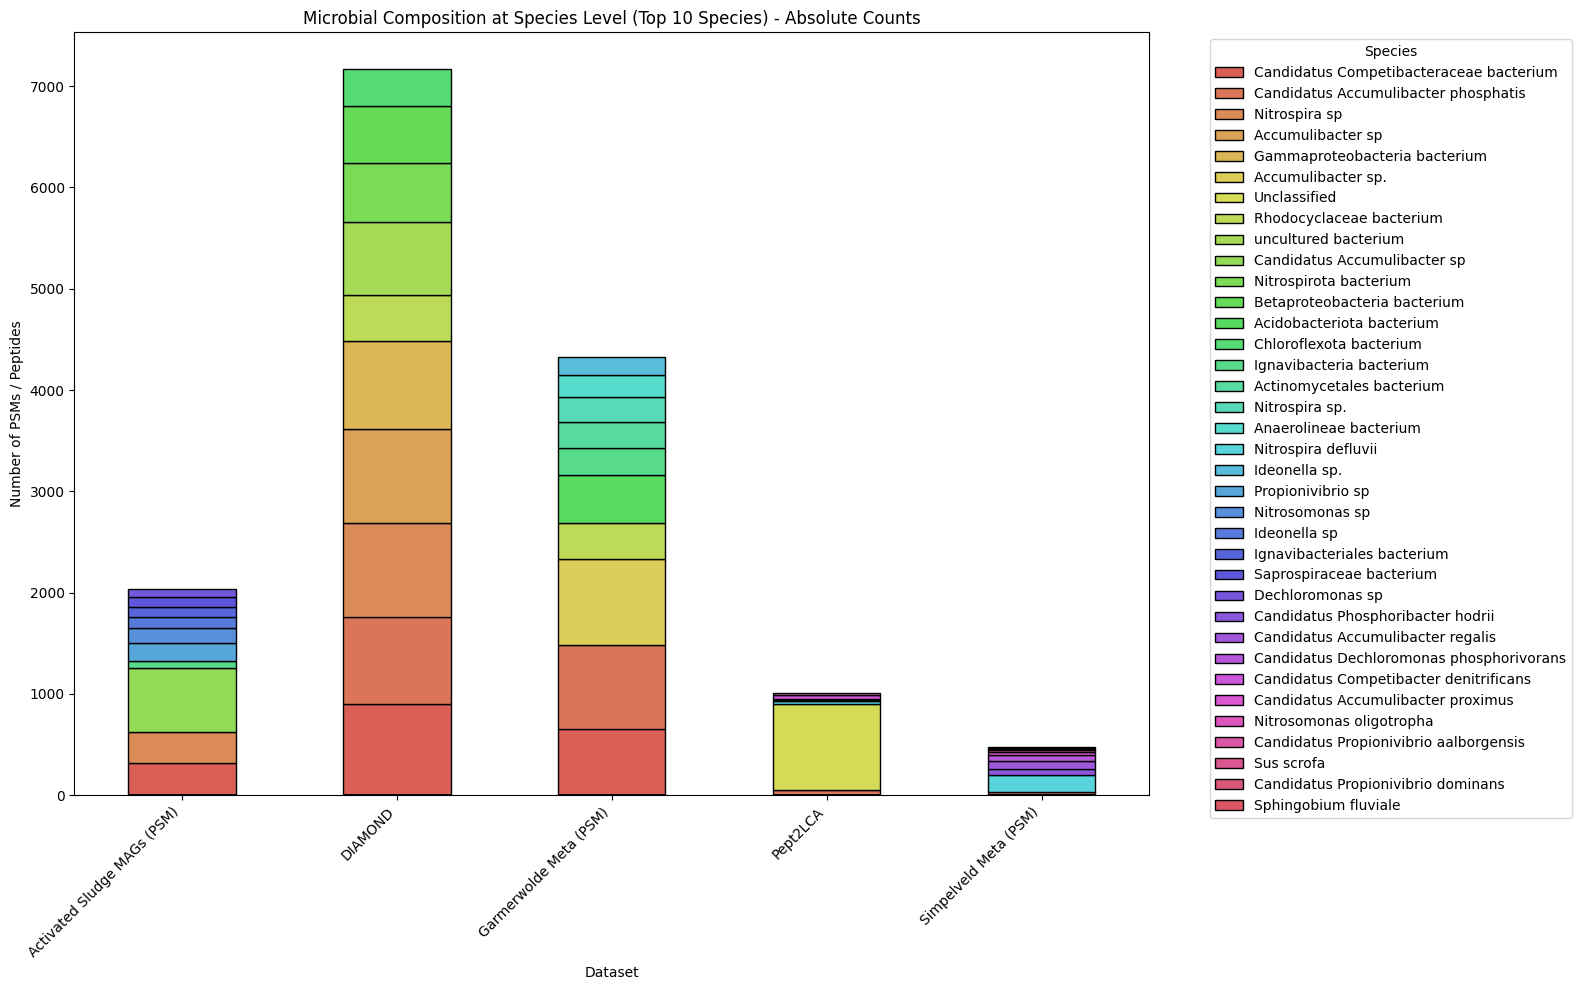

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns

# === Settings ===
TOP_N = 10
collapse_other = False

# === Define input directory ===
community_dir = base_path / "Community_comparisons"

# === Load data ===
df_pept2lca = pd.read_csv(community_dir / "species_composition_pept2lca.csv")
df_diamond = pd.read_csv(community_dir / "diamond_df_rank_annotated_fixed.csv")
df_meta_garmerwolde = pd.read_csv(community_dir / "metagenomics_psm_taxa_annotated.csv")
df_meta_SP_MG = pd.read_csv(community_dir / "SP_MG_metagenpsm_withlcas.csv")
df_meta_AS_MAGs = pd.read_csv(community_dir / "AS_MAGs_taxa_ranks.csv")

# === Counting function ===
def compute_counts(df, species_col, label, top_n=TOP_N, collapse_other=True):
    df = df[[species_col]].dropna().copy()
    df.columns = ["Species"]
    df["Species"] = df["Species"].replace({"root": "Unclassified"})

    counts = df["Species"].value_counts().reset_index()
    counts.columns = ["Species", "Count"]

    if collapse_other:
        top_species = counts.nlargest(top_n, "Count")["Species"]
        counts["Species"] = counts["Species"].apply(lambda x: x if x in top_species.values else "Other")
        counts = counts.groupby("Species", as_index=False)["Count"].sum()
    else:
        counts = counts.nlargest(top_n, "Count")

    counts["Dataset"] = label
    return counts

# === Pept2LCA ===
data_pept2lca = df_pept2lca[["Species", "Count"]].copy()
data_pept2lca["Species"] = data_pept2lca["Species"].replace({"root": "Unclassified"})

if collapse_other:
    top_species = data_pept2lca.nlargest(TOP_N, "Count")["Species"]
    data_pept2lca["Species"] = data_pept2lca["Species"].apply(lambda x: x if x in top_species.values else "Other")
    data_pept2lca = data_pept2lca.groupby("Species", as_index=False)["Count"].sum()
else:
    data_pept2lca = data_pept2lca[data_pept2lca["Species"].isin(
        data_pept2lca.nlargest(TOP_N, "Count")["Species"]
    )]

data_pept2lca["Dataset"] = "Pept2LCA"

# === DIAMOND species hits only ===
df_diamond_species = df_diamond[df_diamond["taxonomy_rank"] == "species"]
data_diamond = compute_counts(df_diamond_species, "organism", "DIAMOND", collapse_other=collapse_other)

# === Garmerwolde Meta ===
data_meta_garmerwolde = compute_counts(
    df_meta_garmerwolde[df_meta_garmerwolde["taxon_rank"] == "species"],
    "taxon_name", "Garmerwolde Meta (PSM)", collapse_other=collapse_other
)

# === Simpelveld Meta ===
data_meta_SP_MG = compute_counts(
    df_meta_SP_MG[df_meta_SP_MG["lca rank"] == "species"],
    "lca name", "Simpelveld Meta (PSM)", collapse_other=collapse_other
)

# === Activated Sludge MAGs ===
data_meta_AS_MAGs = compute_counts(
    df_meta_AS_MAGs[df_meta_AS_MAGs["Taxon_rank"] == "species"],
    "Taxon_names", "Activated Sludge MAGs (PSM)", collapse_other=collapse_other
)

# === Combine selected datasets ===
plot_data = pd.concat([
    data_pept2lca,
    data_diamond,
    data_meta_garmerwolde,
    data_meta_SP_MG,
    data_meta_AS_MAGs
], ignore_index=True)

# === Pivot and sort species columns by total count ===
pivot = plot_data.pivot_table(index="Dataset", columns="Species", values="Count", fill_value=0)
sorted_species = pivot.sum(axis=0).sort_values(ascending=False).index
pivot = pivot[sorted_species]

# === Generate visually distinct colors ===
n_species = len(pivot.columns)
distinct_colors = sns.color_palette("hls", n_species)

# === Create plot ===
fig, ax = plt.subplots(figsize=(16, 10))

pivot.plot(
    kind='bar',
    stacked=True,
    edgecolor='black',
    ax=ax,
    color=distinct_colors  # Ensure each species is visually distinct
)

# === Format plot ===
ax.set_ylabel("Number of PSMs / Peptides")
title_scope = f"Top {TOP_N} Species" + (" + 'Other'" if collapse_other else "")
ax.set_title(f"Microbial Composition at Species Level ({title_scope}) - Absolute Counts")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
ax.legend(title="Species", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.tight_layout()
plt.show()




### Microbial Composition at Species Level (Top 10 Taxa) – Absolute PSM Counts

The stacked bar chart above illustrates the absolute peptide-spectrum matches (PSMs) assigned to the **top 10 most abundant species** across various custom databases used for metaproteomic identification. Notably, the **"Other"** category was excluded to focus exclusively on the dominant species that are shared or unique across strategies.

#### Key Observations

- **DIAMOND Proteome DB** outperforms all other databases in terms of **total peptide identifications**, with over **7000 PSMs** assigned to the top 10 species alone. This is expected given the wide taxonomic coverage of the full UniProt reference proteomes. However, it also increases the risk of **false positives**, especially without taxonomic filtering.
  
- The **Cammerwolde Metagenomic DB** ranks second in total peptide support, identifying roughly **4400 PSMs** across the top 10 species. The overlap in species between this and the DIAMOND DB highlights a shared core microbiome, while differences suggest environment-specific variants that are not present in public repositories.

- **Pept2LCA DB** produces a smaller number of identifications (~1000 PSMs) but concentrates its hits in a few key species. This confirms that de novo peptide-informed filtering yields a **targeted and specific database**, favoring confident identifications over broad sensitivity.

- **Pept2LCA-constructed genus-level metagenomic DB (Simplevel Meta)** shows the **lowest number of identifications**, possibly due to its reduced complexity and lower sequence diversity. However, the identified species are **biologically plausible and context-relevant**, showing the value of simplification for targeted diagnostics.

- The **Sludge MAGs database** identifies a unique spectrum of organisms that are absent or underrepresented in other databases, emphasizing its potential for exploring low-abundance or novel taxa in sludge environments.

#### Dominant Species Across Databases

Among the most represented taxa across multiple databases are:

- *Candidatus Competibacteraceae bacterium*  
- *Candidatus Accumulibacter phosphatis*  
- *Nitrospira sp.*  
- *Accumulibacter sp.*  
- *Gammaproteobacteria bacterium*

These are hallmark species of enhanced biological phosphorus removal (EBPR) systems, consistent with the **wastewater origin** of the samples. Their prevalence across databases validates their biological relevance and supports their inclusion in custom DBs.

#### Interpretation and Implications

- **DIAMOND** offers maximal PSM coverage, but **may overgeneralize taxonomic inference**, especially in microbiomes with uncharacterized diversity.
- **Metagenomic DBs** provide a **high-fidelity match** to the sample's native species, capturing both known and novel variants.
- **Pept2LCA** and **simple metagenomic filtering** strategies, though lower in yield, offer **precision and reduced noise**, which is advantageous for conservative downstream interpretation or biomarker discovery.

By isolating the top 10 taxa, this figure reveals clearer **differences in database performance** and their bias toward certain microbial groups. This approach enhances our understanding of which strategies prioritize depth (broad identification) vs. specificity (high-confidence hits), providing a nuanced view of database utility in metaproteomic workflows.


Results: Species-Level Microbial Composition (Top 10 Species + 'Other') – Absolute Counts
This figure presents the absolute number of PSMs/peptides attributed to the top 10 species (plus 'Other') across different database strategies. These results provide insight into the identification depth (coverage) and database specificity at the species level.

The DIAMOND Proteome DB shows the highest overall peptide assignment count, with over 18,000 identifications. While this suggests excellent coverage, the disproportionately large contribution of the 'Other' category raises concerns about potential false positives or low taxonomic specificity at species rank. Despite this, the prominent hits (e.g., Candidatus Accumulibacter phosphatis, Competibacteraceae, Nitrospira) align with the expected sludge-associated taxa, indicating reasonable ecological validity.

The Garmerwolde Meta (PSM) dataset performs well in both coverage and resolution. A large portion of PSMs are matched to biologically plausible species such as Nitrospira sp., Accumulibacter spp., and Gammmaproteobacteria, while the 'Unclassified' portion remains limited. This indicates low error risk and high representational accuracy, making it a reliable reference baseline.

Pept2LCA (Direct) exhibits very limited species coverage (barely >1000 PSMs total) and is almost entirely dominated by a single genus/species-level bin. This confirms the limitations of the de novo taxonomic strategy when used in isolation, with low taxonomic resolution and reduced depth of identification. The method is insufficient for capturing microbial diversity in complex communities like activated sludge.

Both Activated Sludge MAGs (PSM) and Simpelveld Meta (PSM) yield relatively few identifications, consistent with earlier observations at genus level. The low absolute counts suggest insufficient alignment between the sample peptides and the reference genomes, likely due to ecological differences or incomplete PSM annotation pipelines. This limits their utility as standalone references, although species like Accumulibacter, Competibacter, and Rhodocyclaceae still appear.

🧩 Discussion: Database Performance, Agreement, and Risk of Misannotation
DIAMOND achieves excellent peptide-level sensitivity but may suffer from overgeneralization, where closely related taxa are misassigned due to redundant proteomes. This inflates the 'Other' category and warrants caution when interpreting rare taxa.

Garmerwolde Meta (PSM) strikes the best balance, achieving high species-level coverage with reduced ambiguity, and thus serves as a reliable benchmark for database quality in this pipeline.

Pept2LCA Direct is the weakest performer in terms of absolute counts and taxonomic granularity. The heavy dominance of one taxon may reflect algorithmic bias or incomplete mapping, reinforcing the need for hybrid strategies.

The Activated Sludge MAGs and Simpelveld Meta datasets, while derived from similar ecosystems, fail to capture the full taxonomic breadth of the Garmerwolde sample. Their limited PSM annotation success makes them only marginally informative unless further improved by peptide-specific filtering or database curation.

In conclusion, absolute counts reaffirm that Garmerwolde-based PSM annotation and DIAMOND alignment provide the highest yield and clearest insight at species level, while fully de novo or mismatched environmental datasets underperform in both resolution and peptide capture rate.